# Equações diferencias ordinárias

Equações diferencias ordinárias (EDO) são equações contendo uma ou mais funções de uma variável independente e suas derivadas.

A Lei de Newton é um exemplo de EDO:

$$ \frac{d\vec{P}}{dt} = \vec{F} $$

EDO aparecem em inúmeros contextos científicos e práticos no mundo. É sem dúvida uma das principais ferramentas matemáticas usadas em particular na Física.

Para uma descrição detalhada de EDOs veja: https://en.wikipedia.org/wiki/Ordinary_differential_equation

Em muitas situações soluções exatas analíticas não são possíveis e portato precisamos adotar técnicas numéricas. Veremos aqui as principais técnicas e estratégias para resolver este tipo de equação.


## Método de Euler

Para entender de maneira mais simples a estratégia de solução numérica dessas equações partimos de:

$$ a = \frac{dv}{dt} $$

podemos reescrever a equação acima como:

$$ dv = a~dt $$ 

que pode ser discretizada como 

$$\Delta v = a~ \Delta t$$               (2)

A partir daqui fica fácil implementar estratégias numéricas. Para tanto precisamos definir as condições iniciais do problema que desejamos resolver. A evolução da solução a partir das condições iniciais $t_0$ e $v_0$ é obtida como:

$$ v_{i+1} = v_i + \frac{dv}{dt}~\Delta t $$

Como sabemos a relação entre velocidade e posição podemos obter uma relação semelhante a acima para obter a posição do problema em questão, definindo assim o estado $[x_i,v_i]$ para uma dado tempo $t$.

O método descrito acima é bem simples de ser implementado mas produz soluções bem aproximadas. Ele é conhecido como **Método de Euler**.

## Montando o problema

Antes de seguirmos na discussão dos métodos de resolução de EDOs, é interessante discutiros uma estratégia geral para montar o problema a ser resolvido. Isso facilitará a obtenção de soluções de problemas mais complexos e com métodos diversos mais a frente.

Considere o problema de uma particula em queda livre:

$$ \ddot{x} = -g $$

A equação acima pode ser decomposta em duas EDOs com derivadas simples:

$$ \dot{x} = v $$ $$ \dot{v} = -g $$

Usando o método de Euler para obter o estado $[x_i,v_i]$ da partícula em um dado $t$ temos:

$$ x_{i+1} = x_i + \dot{x}~\Delta t $$
$$ v_{i+1} = v_i + \dot{v}~\Delta t $$

A forma acima sugere que podemos escrever o sistema acima como uma única equação vetorial sendo:

$$ y = \begin{bmatrix} x \\ v \end{bmatrix} $$

$$ \dot{y} = \begin{bmatrix} v \\ -g \end{bmatrix} $$

$$ y_{i+1} = y_i + \dot{y}~\Delta t ~~~~~~~~~~(1)$$

Com base na equação acima, vemos que se temos uma função que retorna as derivadas relevantes do problema e as condições iniciais, podemos usar as capacidades vetoriais do Python para definir uma estratégia genérica de solução de EDOs.

Primeiro definimos o problema ou modelo criando uma função que retorna as derivadas de todos os elementos de $y$.


In [2]:
################################################################
#      Queda livre
# definindo o problema
#
#     d^2x/dt^2 = −g
#
#    y = [x,v] e dy/dt = [v,-g]
#
#   definimos o estado do sistema como y
#

def quedalivre(estado, tempo):
    g0 = estado[1]
    g1 = -9.8
    return np.array( [ g0 , g1 ] )



definido o modelo a ser estudado, podemos escrever a parte que realiza a solução, no caso a implementação do método de Euler:

In [5]:
def euler(y,t,dt,model):
    ynext = y + model(y, t) * dt
    return ynext


Note que a função do método recebe a posição atual, ou estado atual, o tempo atual e o $\Delta t$ adotado, assim como a função que define o modelo a ser estudado. Esta função implemnta a equação (1) discutida acima.

Implementando as duas funções acima para solução de um problema específico agora fica fácil:

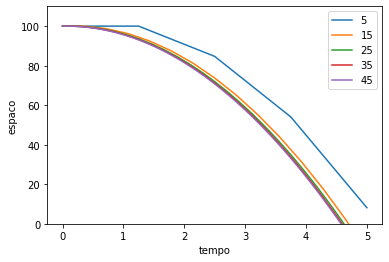

In [15]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

#plt.figure()

for N in range(5,50,10):                # looping para gerar soluções com resoluções diferentes
    
    #definindo valores iniciais
    tmax = 5.0                            #Tempo máximo para o cálculo
    
    dt = tmax / float(N-1)                # delta t a ser usado
    
    time = np.linspace(0 , tmax , N)      # vetor dos tempos
    
    #definindo o vetor de estado do modelo    
    y = np.zeros( [ N, 2 ] )
    
    #definindo os estado inicial
    y [0,0] = 100.                         # posição inicial
    y [0,1] = 0.                           # velocidade inicial


    # Aqui aplicamos o método de Euler a partir da condição inicial 
    # e seguindo pelo vetor de tempo
    
    for j in range (N-1):
        y[j+1] = euler(y[j], time[j], dt, quedalivre)

    
    # plota as soluções obtidas
    plt.plot(time,y[:,0], label=str(N))    
    plt.ylim(0,110)
    plt.xlabel('tempo')
    plt.ylabel('espaco')
    
plt.legend()



### Erros no método de  Euler

Para avaliar os erros cometidos pelo método fazemos uma expansão de Série de Taylor da função y no ponto $t=t_0+h$:

$$ y(t_{0}+h)=y(t_{0})+hy'(t_{0})+{\frac {1}{2}}h^{2}y''(t_{0})+O(h^{3}). $$


note que os dois primeiros termos da série são exatamente o método de Euler. Com isso o erro cometido em cada passo, ou erro de truncamento local (ETL) é dado por:

$$ \mathrm {ETL} =y(t_{0}+h)-y_{1}={\frac {1}{2}}h^{2}y''(t_{0})+O(h^{3}). $$

para $ \xi \in [t_{0},t_{0}+h]$.

Como obtemos as soluções em um número de intervalos e não somente em um ponto, o erro local se propaga para os passos seguintes. Desse modo obtemos o erro de truncamento global (ETG):

$$ \mathrm {ETG} = n\mathrm {ETL} = \frac{(t-t_0)}{h} {\frac {1}{2}}h^{2}y''(t_{0}) = (t-t_0) {\frac {1}{2}}hy''(t_{0}) $$

Ou seja, o método de Euler é um método de primeira ordem em h.

Uma variante simples do método de Euler é o Metodo do Ponto Médio. Neste método a derivada é estimada no ponto $(t+h/2)$, ou seja, no ponto médio entre $t$ e $t+h$. Com essa simples mudança o método do ponto médio se torna um método de orden 2.

## Métodos de Runge-Kutta

Os métodos de Runge-Kutta (RK) podem ser pensados como uma generalização da filosofia apresentada para o Método de Euler. Sendo $\frac{dy}{dx}=f(x,y)$ temos que os métodos RK são da forma:

$$ y_{i+1} = y_i + \varphi (x_i,y_i) h ~~~~~~~~~~(2)$$

onde $\varphi (x_i,y_i)$ são estimativas das derivadas necessárias.
As estimativas das derivadas podem ser do tipo explicito:

$$ \varphi (x_i,y_i) = \sum _{i=1}^{s}a_{i}k_{i} ~~~~~~~~~~(3)$$

ou do tipo implicito:

$$  y_{n+1}=y_{n}+h\sum _{i=1}^{s}b_{i}k_{i} ~~~~~~~~~~(4)$$

onde:

$$ \displaystyle k_{i}=f\left(t_{n}+c_{i}h,\ y_{n}+h\sum _{j=1}^{s}a_{ij}k_{j}\right),\quad i=1,\ldots ,s. $$


onde $a_i$ são constantes e $k_i$ são combinações lineares de estimativas da derivada $\frac{dy}{dx}$.

Para entender melhor vamos construir as formulas para o método RK de segunda ordem.

### Runge-Kutta de segunda ordem 

Para obter as expressões do método RK de $2^a$ ordem começamos pela integração formal do problema a ser estudado:

$$ \frac{dy}{dt} = f(y,t) \implies y(t) = \int{f(y,t)dt}  \implies y_{i+1} = y_i + \int^{t_{i+1}}_{t_i}{f(y,t)dt} $$ 

Para obter a integral expandimos usando uma série de Taylor em torno do ponto médio $t_{i+1/2}$:

$$ f(t,y) \approx f(y_{i+1/2},t_{i+1/2}) + (t-t_{i+1/2}) \frac{df}{dt}_{(t_{i+1/2})} + O(h^{2}) $$

como o termo $(t-t_{i+1/2})$ elevado a qualquer potência ímpar é igualmente positivo e negativo no intervalo $t_i<t<t_{i+1}$ temos:


$$ \int^{t_{i+1}}_{t_i}{f(y,t)dt} \approx f(y_{i+1/2},t_{i+1/2})(t_{i+1}-t_i) + O(h^{3})$$

sendo $h=(t_{i+1}-t_i)$ temos:

$$ y_{i+1} = y_i + f(y_{i+1/2},t_{i+1/2})h + O(h^{3})$$

Veja que o cancelamento dos termos de primeira ordem implica em uma precisão de $2^a$ ordem para o método. Mas a relação acima ainda não é a final pois precisamos obter $f(t_{i+1/2},y_{i+1/2})$. No entanto só sabemos $f(t_{i},y_{i})$. Para fazer isso usamos o método de Euler para obter a derivada no ponto médio:

$$ y_{i+1/2} \approx y_i + \frac{h}{2}\frac{dy}{dt} = y_i + \frac{hf(y_i,t_i)}{2} $$

Assim, podemos resumir o RK de $2^a$ ordem como:

$$ k_1 = hf(y_i,t_i) $$

$$ k_2 = hf(y_i+\frac{1}{2}k_1,t_{i+1/2}) $$

$$ y_{i+1} = y_i + k_2 $$




## Pendulo simples

Vamos aplicar o que vimos acima para a solução do proble do pendulo simples. Assumindo que podemos desprezar a resistência do ar podemos escrever a EDO para este sistema com base na lei de Newton como:

$$ {\frac {d^{2}\theta }{dt^{2}}}+{\frac {g}{\ell }}\sin \theta =0. $$

A solução para angulos pequenos onde $\sin \theta \approx \theta$ pode ser obtida analíticamente e é dada por:

$$ \theta (t)=\theta _{0}\cos \left({\sqrt {g \over \ell }}t\right) $$


Usando a metodologia descrita anteriormente definimos este problema como:

In [6]:
################################################################
#      Oscilador Harmonico
#      definindo o problema para a equação 
#      dxˆ2/dt = − g/l sin(theta)
#
#      d1 -> dtheta/dt=v   e d2 -> dv/dt = − g/l sin(theta)

def pendulo(estado, tempo):
    l = 0.1                           # comprimento do pendulo
    
    g0 = estado[1]                    # primeira derivada 
    
    g1 = -9.8/l*np.sin(estado[0])     # segunda derivada
    
    return np.array( [ g0 , g1 ] )


O método de RK de $2^a$ ordem é implementado como:

In [28]:
def rk2 (y, time, dt, model):
    k0 = dt * model(y, time )
    k1 = dt * model(y + k0, time + dt)
    ynext = y + 0.5 * (k0 + k1)
    return ynext

Note a semelhança com a implementação do método de Euler feita anteriormente.

Para resolvermos o problema agora, basta escrever o programa de modo a definir as condições iniciais.

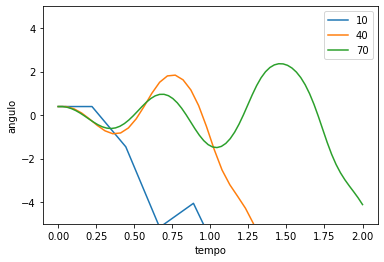

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Resolvendo o problema com Euler

tmax = 2.0 #limite de tempo

plt.figure()

for N in range(10,100,30):
    
    dt = tmax / float(N-1)
    time = np.linspace(0 , tmax , N)
    
    # definindo estado inicial
    y = np.zeros( [ N, 2 ] )
    y [0,0] = np.pi/8.0   # angulo inicial
    y [0,1] = 0.          # velocidade angular inicial



    for j in range (N-1):
        y[j+1] = euler(y[j], time[j], dt, pendulo)


    plt.plot(time,y[:,0],label=str(N))    
    plt.ylim(-5,5)
    plt.xlabel('tempo')
    plt.ylabel('angulo')
plt.legend()

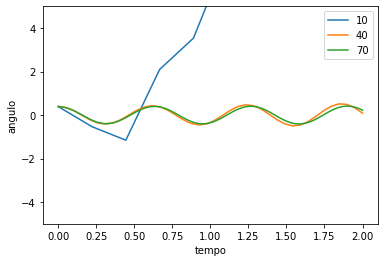

In [33]:
# Resolvendo o problema com RK2a

tmax = 2.0 #limite de tempo

plt.figure()

for N in range(10,100,30):
    
    dt = tmax / float(N-1)
    time = np.linspace(0 , tmax , N)
    
    # definindo estado inicial
    y = np.zeros( [ N, 2 ] )
    y [0,0] = np.pi/8.0   # angulo inicial
    y [0,1] = 0.          # velocidade angular inicial



    for j in range (N-1):
        y[j+1] = rk2(y[j], time[j], dt, pendulo)


    plt.plot(time,y[:,0],label=str(N))    
    plt.ylim(-5,5)
    plt.xlabel('tempo')
    plt.ylabel('angulo')
plt.legend()

### Formulação geral do problema

Vimos acima que podemos formular o problema de modo a facilitar sua implementação numerica para diversos algorítmos. Podemos formular o problema também de forma mais generalizada de modo que possamos implementar problemas mais complexos, por exemplo, quando tivermos diversas equações diferencias com mais de uma variável.

Suponha por exemplo que tenhamo duas equações diferencias que queremos resolver:

$$ \frac{dx}{dt} = f_x(x,y,t), ~~~ \frac{dy}{dt} = f_y(x,y,t) $$

onde $f_x$ e $f_y$ são funções de x, y e t e possívelmente não lineares. 

Podemos escrever esse sistema de equações usando notação vetorial como:

$$ \frac{d\mathbf{r}}{dt} = \mathbf{f}(\mathbf{r},t) $$

onde $\mathbf{r}=(x,y,...)$ e $\mathbf{f}$ é o vetor de funções $\mathbf{f}(\mathbf{r},t) = (f_x(\mathbf{r},t),f_y(\mathbf{r},t),...)$ 

Com essa notação podemos expressar por exemplo o método de Euler como:

$$ \mathbf{r}(t+h) = \mathbf{r}(t) + h\mathbf{f}(\mathbf{r},t)$$



### Runge-Kutta de quarta ordem 

A lógica na obtenção do método RK de segunda ordem pode ser expandido através da obtenção de expansões de Taylor em torno de outros pontos e depois obtendo uma combinação linear das estimativas. Em princípio podería-se expandir em ordens cada vez maiores, no entanto em geral um bom equilibrio entre precisão e complexidade (custo computacional) é o RK de quarta ordem. As equações para este algorítmo são:

$$ x(t+h) = x(t) + \frac{1}{6} ( k_1 + 2k_2 + 2k_3 + k_4 ) $$

onde 

$$ k_1 = hf(x,t) $$
$$ k_2 = hf(x+1/2k_1,t+1/2h) $$
$$ k_3 = hf(x+1/2k_2,t+1/2h) $$
$$ k_4 = hf(x+k_3,t+h) $$

Para mais detalhes veja: https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods#:~:text=In%20numerical%20analysis%2C%20the%20Runge,solutions%20of%20ordinary%20differential%20equations.


Podemos aplicar o método acima de forma genérica como em métodos anteriores subsituindo $f(x,t)$ por $\mathbf{f}(\mathbf{r},t)$.



### Aplicando a forma generalizada da formulação

Para entender melhor a aplicação do que foi discutido acima, vamos tentar modelar o problema do espalhamento de uma infecção.

Imagine um internato no interior do país. Esta escola é uma sociedade pequena e fechada. De repente, um ou mais alunos pegam gripe. Esperamos que a gripe possa se espalhar de forma bastante eficaz ou desaparecer. A questão é quantos alunos e funcionários da escola serão afetados. Um modelo simples pode nos ajudar a compreender a dinâmica de como a doença se espalha.

Usamos uma função $S(t)$ contar quantos indivíduos, no momento $t$, têm a possibilidade de se infectar. Aqui, $t$ pode contar horas ou dias, por exemplo. Esses indivíduos constituem uma categoria denominada suscetíveis. Outra categoria consiste nos indivíduos infectados. Vamos usar a funao $I(t)$ contar quantos há na categoria I no momento $t$. Assumimos aqui por simplicidade  que um indivíduo que se recuperou da doença ganhou imunidade. Também existe uma pequena possibilidade de que um infectado morra. Em ambos os casos, o indivíduo é movido da categoria I para uma categoria que chamamos de categoria removida, rotulada com R. Usamos a função $R(t)$ para contar o número de indivíduos na categoria R categoria no tempo $t$. Quem entra na categoria R, não pode sair desta categoria.

Para resumir, a propagação desta doença é essencialmente a dinâmica de mover os indivíduos da categoria S para a I e depois para a R:

![Image of Yaktocat](http://hplgit.github.io/prog4comp/doc/pub/p4c-sphinx-Python/_images/categories_SIR.png)

Este exemplo é um resumo do que é apresentado em detalhes em: http://hplgit.github.io/prog4comp/doc/pub/p4c-sphinx-Python/._pylight005.html#spreading-of-diseases

O problema pode ser descrito pelo seguinte sistema de equações:

$$ S' = -\beta SI $$
$$ I' = \beta SI - \gamma I $$
$$ R' = \gamma I $$

onde:

- $\beta$ é o número médio de contatos por pessoa por tempo, multiplicado pela probabilidade de transmissão da doença em um contato entre um sujeito suscetível e um infeccioso

- $\gamma$ é a probabilidade de que um indivíduo se recupere em um intervalo de tempo unitário. Alternativamente, se um indivíduo é infeccioso por um período médio de tempo $D$, então $\gamma = 1 / D$ 



detalhes sobre esse modelo e outras variantes podem ser obtidos aqui: https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology

Tomando em conta a formulação vetorial discutida acima podemos escrever o modelo como:

$$ \mathbf{r} = (S(t), I(t), R(t)) $$

$$ \mathbf{r}^{n+1} = \mathbf{r}^n + \Delta t \mathbf{f}(\mathbf{r}^n, t_n) $$

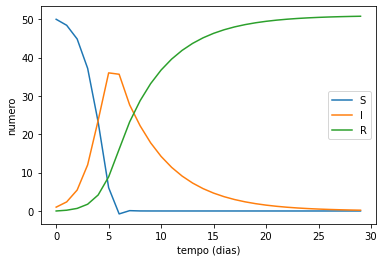

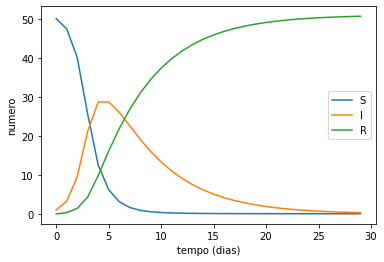

In [36]:
import matplotlib.pyplot as plt
import numpy as np

################################################################
#      Modelo SIR

def SRI(estado, tempo):
    
    S, I, R = estado
    
    g0 = -beta*S*I
    g1 = beta*S*I - gamma*I
    g2 = gamma*I

    return np.array( [ g0 , g1, g2 ] )

def euler(y,t,dt,model):
    ynext = y + model(y, t) * dt
    return ynext

def rk2 (y, time, dt, model):
    k0 = dt * model(y, time )
    k1 = dt * model(y + k0, time + dt)
    ynext = y + 0.5 * ( k0 + k1 )
    return ynext

# Resolvendo o problema com RK2a

# considerando que no início de um dia havia 40 suscetíveis e 8 infectados,
# e que no dia seguinte haviam 30 e 18, respectivamente
beta = 10./(40*8*24)

# Entre 15 infectados, observou-se que 3 se recuperaram durante um dia
gamma = 3./(15*24)

dt = 24             # em horas
D = 30               # Simula para D days
tmax = (D*24)     # tempo final

time = np.arange(0 , tmax , dt)

# definindo estado inicial
y = np.zeros( [ time.size, 3 ] )
y [0,0] = 50
y [0,1] = 1.
y [0,2] = 0.

y_euler = np.copy(y)
y_rk2 = np.copy(y)

# aplica Euler e RK2
for j in range (time.size-1):
    y_rk2[j+1,:] = rk2(y_rk2[j,:], time[j], dt, SRI)
    y_euler[j+1,:] = euler(y_euler[j,:], time[j], dt, SRI)
    

plt.figure()
plt.plot(time/24.,y_euler[:,0],label='S')    
plt.plot(time/24.,y_euler[:,1],label='I')    
plt.plot(time/24.,y_euler[:,2],label='R')    
plt.xlabel('tempo (dias)')
plt.ylabel('numero')
plt.legend()

plt.figure()
plt.plot(time/24.,y_rk2[:,0],label='S')    
plt.plot(time/24.,y_rk2[:,1],label='I')    
plt.plot(time/24.,y_rk2[:,2],label='R')    
plt.xlabel('tempo (dias)')
plt.ylabel('numero')
plt.legend()



In [3]:
import matplotlib.pyplot as plt
import numpy as np
np.arange(0 , tmax , dt)

array([0.0000e+00, 1.0000e-01, 2.0000e-01, ..., 4.3197e+03, 4.3198e+03,
       4.3199e+03])

In [5]:
time.size


43200